<a href="https://colab.research.google.com/github/Clemkun/Fadillah-Murti-UAS-DATA-SIENCE/blob/main/UAS_Data_Sience_FadillahMurti_227006516079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# =========================
# Import Library & Load Dataset
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [87]:
# Load dataset
df = pd.read_csv("Campus Recruitment.csv")

# Lihat 5 data pertama
df.head(300)

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Internasional,82.00,Internasional,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,8000000.0
211,212,M,58.00,Swasta,60.00,Swasta,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,5500000.0
212,213,M,67.00,Swasta,67.00,Swasta,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,5900000.0
213,214,F,74.00,Swasta,66.00,Swasta,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,4080000.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                215 non-null    int64  
 1   Jenis Kelamin                     214 non-null    object 
 2   Nilai rata-rata SMP               213 non-null    float64
 3   Lembaga pendidikan kelas 10       215 non-null    object 
 4   Nilai rata-rata SMA               214 non-null    float64
 5   Lembaga pendidikan kelas 12       215 non-null    object 
 6   Jurusan saat SMA                  215 non-null    object 
 7   IPK                               215 non-null    float64
 8   Program studi sarjana             215 non-null    object 
 9   Pengalaman kerja sebelum lulus    215 non-null    object 
 10  Nilai tes kemampuan kerja         209 non-null    float64
 11  Pendidikan pascasarjana           215 non-null    object 
 12  Nilai ra

In [89]:
df.describe()

,ID,Nilai rata-rata SMP,Nilai rata-rata SMA,IPK,Nilai tes kemampuan kerja,Nilai rata-rata pascasarjana,Gaji
count,215.000000,213.000000,214.000000,215.000000,209.000000,215.000000,1.480000e+02
mean,108.000000,67.273380,66.330047,66.370186,72.114115,62.278186,5.773108e+06
std,62.209324,10.842297,10.922964,7.358743,13.351612,5.833385,1.869149e+06
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,4.000000e+06
25%,54.500000,60.400000,60.850000,61.000000,60.000000,57.945000,4.800000e+06
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,5.300000e+06
75%,161.500000,75.400000,73.000000,72.000000,84.000000,66.255000,6.000000e+06
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,1.880000e+07


In [90]:
df.isnull().sum()

,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


In [91]:
# Hapus ID (tidak informatif)
df.drop(columns=['ID'], inplace=True, errors='ignore')

# Handle missing value jika ada
df.fillna(df.median(numeric_only=True), inplace=True)



In [104]:
# AUTO DETECT TARGET COLUMN

target = None

for col in df.columns:
    if 'status' in col.lower() or 'place' in col.lower():
        target = col
        break

print("Target column ditemukan:", target)

# Pisahkan X dan y
X = df.drop(columns=[target])
y = df[target]

le = LabelEncoder()
y = le.fit_transform(y)

Target column ditemukan: status kelulusan (Bekerja/Belum)


In [102]:
# Pisahkan numerik & kategorikal
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Numerical:", list(num_cols))
print("Categorical:", list(cat_cols))


Numerical: ['Nilai rata-rata SMP', 'Nilai rata-rata SMA', 'IPK', 'Nilai tes kemampuan kerja', 'Nilai rata-rata pascasarjana', 'Gaji']
Categorical: ['Jenis Kelamin', 'Lembaga pendidikan kelas 10', 'Lembaga pendidikan kelas 12', 'Jurusan saat SMA', 'Program studi sarjana', 'Pengalaman kerja sebelum lulus', 'Pendidikan pascasarjana']


In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [94]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', LabelEncoder(), cat_cols)   # alternatif simple encoding
])


In [96]:
from sklearn.preprocessing import OrdinalEncoder

# Redefine preprocessor to use OrdinalEncoder for categorical features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OrdinalEncoder(), cat_cols) # Use OrdinalEncoder for multiple categorical columns
])

rf_model = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.97      0.98        30

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



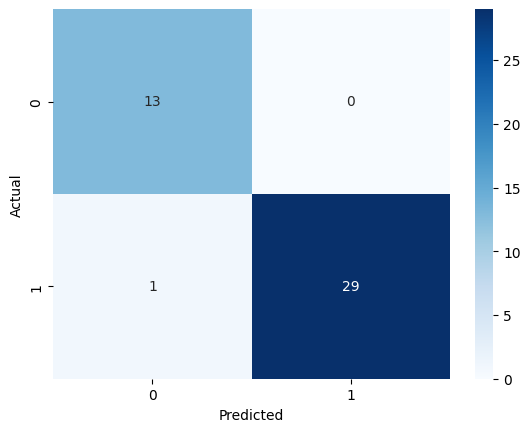

In [105]:
#Evaluasi Model (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [106]:
#Analasis Faktor yang mempengaruhi
model = rf_model.named_steps['model']

importances = model.feature_importances_

feature_names = rf_model.named_steps['prep'].get_feature_names_out()

imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

imp_df.head(10)


,Feature,Importance
5,num__Gaji,0.233002
0,num__Nilai rata-rata SMP,0.220584
2,num__IPK,0.169701
1,num__Nilai rata-rata SMA,0.125682
4,num__Nilai rata-rata pascasarjana,0.067396
3,num__Nilai tes kemampuan kerja,0.038200
8,cat__Lembaga pendidikan kelas 12,0.037772
11,cat__Pengalaman kerja sebelum lulus,0.022409
12,cat__Pendidikan pascasarjana,0.021842
7,cat__Lembaga pendidikan kelas 10,0.020738


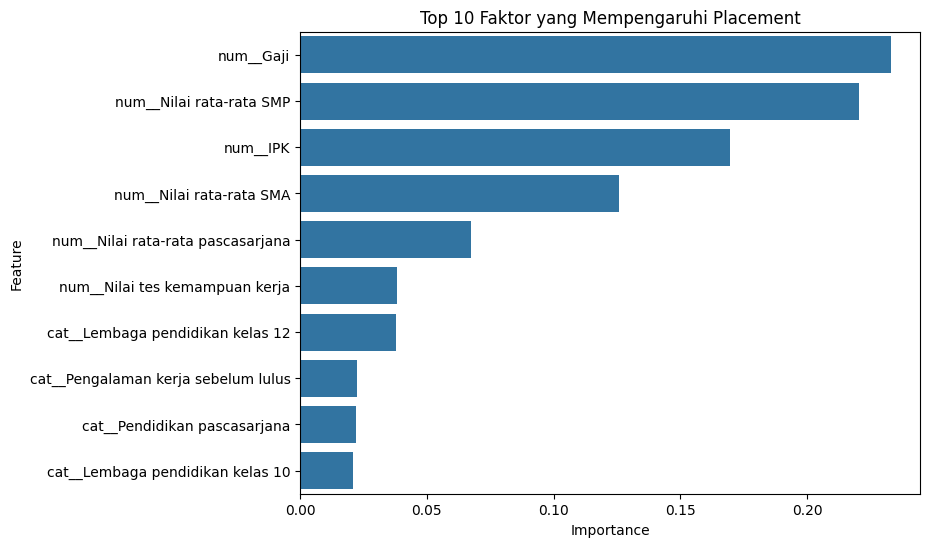

In [107]:
#Visualsasi Faktor yang mempengaruhi
plt.figure(figsize=(8,6))
sns.barplot(data=imp_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Faktor yang Mempengaruhi Placement")
plt.show()


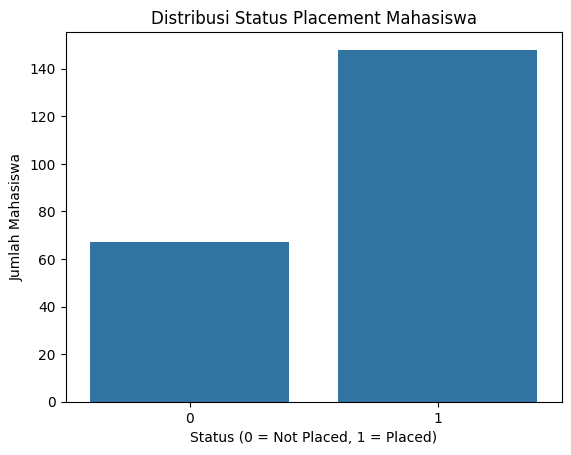

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("Distribusi Status Placement Mahasiswa")
plt.xlabel("Status (0 = Not Placed, 1 = Placed)")
plt.ylabel("Jumlah Mahasiswa")
plt.show()
